In [7]:
import os
import json

def read_json(filename):
    with open(filename) as f:
        return [json.loads(line) for line in f.readlines()]

DATA_DIR = "../Data/mpii_human_pose_v1"

annotations = read_json("../Data/mpii_human_pose_v1/data.json")

In [10]:
print(len(annotations))
print(annotations[0])

19919
{'filename': '015601864.jpg', 'train': 1, 'head_rect': [627.0, 100.0, 706.0, 198.0], 'is_visible': {'6': 0, '7': 1, '8': 0, '9': 0, '0': 1, '1': 1, '2': 1, '3': 0, '4': 1, '5': 1, '10': 1, '11': 1, '12': 1, '13': 1, '14': 1, '15': 1}, 'joint_pos': {'6': [610.0, 187.0], '7': [647.0, 176.0], '8': [637.0201, 189.8183], '9': [695.9799, 108.1817], '0': [620.0, 394.0], '1': [616.0, 269.0], '2': [573.0, 185.0], '3': [647.0, 188.0], '4': [661.0, 221.0], '5': [656.0, 231.0], '10': [606.0, 217.0], '11': [553.0, 161.0], '12': [601.0, 167.0], '13': [692.0, 185.0], '14': [693.0, 240.0], '15': [688.0, 313.0]}}


In [ ]:

if 'keypoints' in ann and type(ann['keypoints']) == list:
    # turn skeleton into zero-based index
    sks = np.array(coco_kps.loadCats(ann['category_id'])[0]['skeleton'])-1
    print(sks)
    kp = np.array(ann['keypoints'])
    x = kp[0::3]
    y = kp[1::3]
    v = kp[2::3]
    
    print(x)
    print(y)
    print(v)
    
    c = "blue"
    for sk in sks:
        if np.all(v[sk]>0):
            plt.plot(x[sk],y[sk], linewidth=3, color=c)
    plt.plot(x[v>0], y[v>0],'o',markersize=8, markerfacecolor=c, markeredgecolor='k',markeredgewidth=2)
    plt.plot(x[v>1], y[v>1],'o',markersize=8, markerfacecolor=c, markeredgecolor=c, markeredgewidth=2)

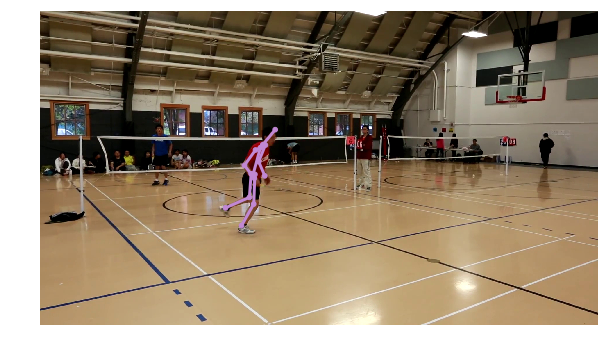

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np
import os
import json

def read_json(filename):
    with open(filename) as f:
        return [json.loads(line) for line in f.readlines()]

DATA_DIR = "../Data/mpii_human_pose_v1/"
annotations = read_json(os.path.join(DATA_DIR, "data.json"))
   
id_to_name = {
    0: "r ankle",
    1: "r knee",
    2: "r hip",
    3: "l hip",
    4: "l knee",
    5: "l ankle",
    6: "pelvis",
    7: "thorax",
    8: "upper neck",
    9: "head top",
    10: "r wrist",
    11: "r elbow",
    12: "r shoulder",
    13: "l shoulder",
    14: "l elbow",
    15: "l wrist"
}

bones = [
    [0, 1],
    [1, 2],
    [2, 6],
    [5, 4],
    [3, 4],
    [3, 6],
    [6, 7],
    [7, 8],
    [8, 9],
    [7, 12],
    [12, 11],
    [11, 10],
    [7, 13],
    [13, 14],
    [14, 15]
]

ann = annotations[np.random.randint(0, len(annotations))]

img_path = os.path.join(DATA_DIR, "images", ann["filename"])
img = mpimg.imread(img_path)

# Create figure and axes
fig, ax = plt.subplots(1, figsize=(10.0, 12.0))

# Display the image
ax.imshow(img)

c = (np.random.random((1, 3))*0.6+0.4).tolist()[0]

for i in range(16):
    x, y = ann["joint_pos"][str(i)]
    ax.add_patch(patches.Circle((x, y), 8, linewidth=1, edgecolor=c, facecolor=c))

for i, j in bones:
    x1, y1 = ann["joint_pos"][str(i)]
    x2, y2 = ann["joint_pos"][str(j)]
    plt.plot([x1, x2], [y1, y2], linewidth=3, color=c)
    
plt.axis('off')
plt.show()

- annolist(imgidx) - annotations for image imgidx
	- image.name - image filename
	- annorect(ridx) - body annotations for a person ridx
			- x1, .y1, .x2, .y2 - coordinates of the head rectangle
			- scale - person scale w.r.t. 200 px height
			- objpos - rough human position in the image
			- annopoints.point - person-centric body joint annotations
				- x, .y - coordinates of a joint
				- id
					- 0 - r ankle
					- 1 - r knee
					- 2 - r hip
					- 3 - l hip
					- 4 - l knee
					- 5 - l ankle
					- 6 - pelvis
					- 7 - thorax
					- 8 - upper neck
					- 9 - head top
					- 10 - r wrist
					- 10 - r wrist
					- 12 - r shoulder
					- 13 - l shoulder
					- 14 - l elbow
					- 15 - l wrist
				- is_visible - joint visibility
	- vidx - video index in video_list
	- frame_sec - image position in video, in seconds
- img_train(imgidx) - training/testing image assignment 
- single_person(imgidx) - contains rectangle id ridx of *sufficiently separated* individuals
- act(imgidx) - activity/category label for image imgidx
	- act_name - activity name
	- cat_name - category name
	- act_id - activity id
- video_list(videoidx) - specifies video id as is provided by YouTube. To watch video on youtube go to https://www.youtube.com/watch?v=video_list(videoidx) 